# Can we classify open clusters and globular clusters using their B-V index and true diameter?

### Nguyen Dac Hung, Kennedy Gurski, Matthew Land, Guillerime 

## Abstract

A star cluster is a group of stars that is gravitationally bounded together. They can be classified into two groups, globular and open clusters. Globular clusters are made of thousands to millions of predominantly older stars held together by strong self-gravitation. Open clusters, on the other hand, are made of younger stars loosely bounded together. Because of this difference in age of stars, globular clusters tend to be more red, corresponding to a higher B-V index (the difference in magnitude of light on the blue spectrum and visible spectrum) (Archinal & Hynes, 2003). Additionally, because of the difference in number of stars, we propose that globular clusters tend to be greater in size than open clusters. Here, we created three machine learning models, a linear regression model, a logistic regression model, and a SVM classification model to see if it is viable to classify clusters with these features. Out of our three models, the SVM classification model worked the best with a 100% accuracy rate, followed by the logistic regression and linear regression models with 80.7% and 69.5% accuracy respectively. These models can be applied in future catalogs to automate the classification process. This work also provides us with a model to better understand the main differences between globular and open clusters.

## Introduction

## Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
def get_angular_size(r_h):
	'''Go  from half light radius to true radius, based on King (1966) model for half light radius.
	Takes half light radius, in arcmin, and multiply by 2.5 to get angular radius.
	Multiply by 2 again to get angular diameter (angular size)
	'''
	return 2.5 * r_h * 2


def get_true_diameter(angular_size, dist):
	'''Takes angular size, in arcmin, and distance from Sun, in pc,
	Calculates true diameter (in pc)
	'''
	diam_rad = angular_size * (2.9089 * 10**-4) # 2.9089 * 10^-4 rad = 1 arcmin
	return diam_rad * dist 


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


def get_angular_size(r_h):
	'''Go  from half light radius to true radius, based on King (1966) model for half light radius.
	Takes half light radius, in arcmin, and multiply by 2.5 to get angular radius.
	Multiply by 2 again to get angular diameter (angular size)
	'''
	return 2.5 * r_h * 2


def get_true_diameter(angular_size, dist):
	'''Takes angular size, in arcmin, and distance from Sun, in pc,
	Calculates true diameter (in pc)
	'''
	diam_rad = angular_size * (2.9089 * 10**-4) # 2.9089 * 10^-4 rad = 1 arcmin
	return diam_rad * dist 


# GLOBULAR CLUSTER DATA READING
glob_data1 = pd.read_csv("glob_data.txt", skiprows = 72, nrows = 157, delim_whitespace = True, header = None)
glob_data2 = pd.read_csv("glob_data.txt", skiprows = 252, nrows = 157, delim_whitespace = True, header = None)
glob_data3 = pd.read_csv("glob_data.txt", skiprows = 433, nrows = 157, delim_whitespace = True, header = None)

# Combining the first two columns because the names were split
glob_data1["Cname"] = glob_data1.iloc[:,0] + glob_data1.iloc[:,1].astype(str)


glob_data = pd.concat([glob_data1["Cname"], glob_data1.iloc[:,4:10], glob_data1.iloc[:,10], glob_data2.iloc[:,4], glob_data3.iloc[:,9]], axis = 1)
glob_data.columns = ["Cname", "RA1", "RA2","RA3", "Dec1", "Dec2", "Dec3", "R_sun", "E(B-V)","r_h" ]


# OPEN CLUSTER DATA READING
open_data = pd.read_csv("open_data.tsv", skiprows = 39, delimiter = "\t", header = None)

# Code generated by ChatGPT-4o (OpenAI, 2024) - November 2024 version, Prompt: "I have too many whitespace missing values in my dataset, how do I remove them?"
open_data = open_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove leading/trailing spaces
open_data.replace('', pd.NA, inplace=True)  # Replace empty strings with NaN
open_data = open_data.dropna()

open_data.columns = ["RA", "Dec", "Diam", "Dist", "Age (log years)", "Metallicity", "E(B-V)", "Cname", "_RA.icrs", "_DE.icrs"]
open_data['Diam'] = pd.to_numeric(open_data['Diam'], errors = "coerce")
open_data['Dist'] = pd.to_numeric(open_data['Dist'], errors = "coerce")

print("Globular Data","\n")
print(glob_data.head())

print("Open Data", "\n")
print(open_data)

Globular Data 

      Cname    RA1  RA2   RA3  Dec1    Dec2   Dec3  R_sun  E(B-V)   r_h
0    NGC104   5.67  -72   4.0  52.6  305.89 -44.89    4.5    0.04  3.17
1    NGC288  45.24  -26  34.0  57.4  152.30 -89.38    8.9    0.03  2.23
2    NGC362  14.26  -70  50.0  55.6  301.53 -46.25    8.6    0.05  0.82
3  Whiting1  57.00   -3  15.0  10.0  161.22 -60.76   30.1    0.03   NaN
4   NGC1261  16.21  -55  12.0  58.4  270.54 -52.12   16.3    0.01  2.99
Open Data 

          RA     Dec  Diam  Dist Age (log years) Metallicity E(B-V)  \
4    00 01.7  -30 12  89.0   190            7.70        0.03   0.09   
26   00 39.4  +85 04  13.0  1550            9.70       -0.06   0.04   
42   01 26.1  +63 03   4.4   900            9.10       -0.76   0.90   
60   01 54.8  +37 26  49.0   400            9.04       -0.21   0.02   
86   02 38.8  +42 34  35.0   440            8.29       -0.26   0.04   
..       ...     ...   ...   ...             ...         ...    ...   
909  20 32.5  +28 08  31.0   800           

/tmp/ipykernel_2122051/2896151044.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  glob_data1 = pd.read_csv("glob_data.txt", skiprows = 72, nrows = 157, delim_whitespace = True, header = None)
/tmp/ipykernel_2122051/2896151044.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  glob_data2 = pd.read_csv("glob_data.txt", skiprows = 252, nrows = 157, delim_whitespace = True, header = None)
/tmp/ipykernel_2122051/2896151044.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  glob_data3 = pd.read_csv("glob_data.txt", skiprows = 433, nrows = 157, delim_whitespace = True, header = None)
/tmp/ipykernel_2122051/2896151044.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map

### Calculate the true diameter (in parsecs)

In [4]:
glob_data['true diam'] = get_true_diameter(get_angular_size(glob_data['r_h']), 1000 * glob_data['R_sun'])
glob_data

,Cname,RA1,RA2,RA3,Dec1,Dec2,Dec3,R_sun,E(B-V),r_h,true diam
0,NGC104,5.67,-72,4.0,52.6,305.89,-44.89,4.5,0.04,3.17,20.747729
1,NGC288,45.24,-26,34.0,57.4,152.30,-89.38,8.9,0.03,2.23,28.866469
2,NGC362,14.26,-70,50.0,55.6,301.53,-46.25,8.6,0.05,0.82,10.256781
3,Whiting1,57.00,-3,15.0,10.0,161.22,-60.76,30.1,0.03,NaN,NaN
4,NGC1261,16.21,-55,12.0,58.4,270.54,-52.12,16.3,0.01,2.99,70.885530
...,...,...,...,...,...,...,...,...,...,...,...
152,NGC7089,27.02,0,49.0,23.7,53.37,-35.77,11.5,0.06,1.06,17.729746
153,NGC7099,22.12,-23,10.0,47.5,27.18,-46.84,8.1,0.03,1.03,12.134476
154,Pal12,38.84,-21,15.0,9.4,30.51,-47.68,19.0,0.02,3.64,100.589762
155,Pal13,44.44,12,46.0,19.2,87.10,-42.70,26.0,0.05,0.36,13.613652


In [5]:
open_data['true diam'] = get_true_diameter(open_data['Diam'], open_data['Dist'])
open_data.describe()

,Diam,Dist,true diam
count,79.000000,79.000000,79.000000
mean,31.224051,1193.721519,5.187128
std,51.736448,1052.228014,3.347563
min,4.000000,48.000000,1.047204
25%,10.000000,525.000000,2.529289
50%,14.000000,840.000000,4.799685
75%,30.000000,1475.000000,7.126805
max,329.000000,5200.000000,22.689420


# The Support Vector Machine Classification Model

We train a ML model using SVM classification similar to in class. In this model, we handle missing data by replacing them with NaN values and split the test and training data by 30%, 70% respectively. 

Best C: 10.0
Best gamma: 0.01
Predicting names on the test set
[[48  0]
 [ 0 23]]


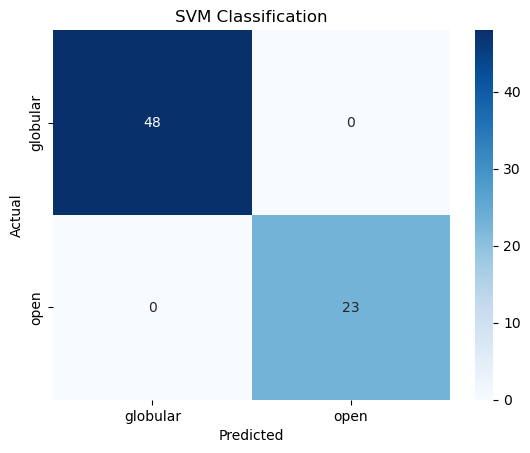

              precision    recall  f1-score   support

    globular       1.00      1.00      1.00        48
        open       1.00      1.00      1.00        23

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume glob_data and open_data are already loaded

# Add 'ClusterType' column for each dataset
glob_data['ClusterType'] = 'globular'
open_data['ClusterType'] = 'open'

# Select relevant features and create copies to avoid warnings
glob_data_features = glob_data[['true diam', 'R_sun', 'E(B-V)', 'r_h']].copy()
open_data_features = open_data[['Diam', 'Dist', 'E(B-V)']].copy()

glob_data_features['ClusterType'] = glob_data['ClusterType']
open_data_features['ClusterType'] = open_data['ClusterType']

# Combine datasets and shuffle to add randomness
combined_data = pd.concat([glob_data_features, open_data_features], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

# Impute missing values in combined_data for each column
imputer = SimpleImputer(strategy='median')
combined_data[['true diam', 'R_sun', 'E(B-V)', 'r_h']] = imputer.fit_transform(
    combined_data[['true diam', 'R_sun', 'E(B-V)', 'r_h']]
)

# Check for any remaining NaN values and handle if needed
if combined_data.isna().sum().sum() > 0:
    combined_data = combined_data.fillna(0)  # Replace remaining NaNs with zero if any are left

# Separate features and target
X = combined_data.drop('ClusterType', axis=1)
y = combined_data['ClusterType']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for C and gamma
param_grid = {
    'C': np.logspace(-2, 2, 5),      # C values from 0.01 to 100
    'gamma': np.logspace(-3, 1, 5)   # gamma values from 0.001 to 10
}

# Use GridSearchCV to find the best parameters
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the model has been trained and `X_test`, `y_test`, and `grid_search` exist

# Predict the labels for the test set
print("Predicting names on the test set")
pred_labels = grid_search.predict(X_test)  # Ensure grid_search is defined and trained

# Get the unique class labels from y_test to use as the 'labels' argument
class_labels = np.unique(y_test)  # Ensure y_test is defined and contains actual class labels

# Print confusion matrix with labels for each class
print(confusion_matrix(y_test, pred_labels, labels=class_labels))

# Visualize confusion matrix as a heatmap
cm = confusion_matrix(y_test, pred_labels, labels=class_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Classification")
plt.show()

# Print classification report
print(classification_report(y_test, pred_labels))

# Data Analysis

We conducted regression and classification of three different models to see whether a machine learning algorithm could be used to identify open star clusters vs globular star clusters. The  two primary features we used were the B-V index and the true diameter of the cluster. 

The most successful model seemed to be the SVM classification model as it achieved a 100% accuracy rate with 0 false positives and 0 false negatives.